In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
X_full = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv', index_col= 'id')
X_test_full = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv', index_col= 'id')

# Remove rows with missing values
X_full.dropna(axis=0,subset=['Price'],inplace=True)

# Seperate Targets
y = X_full.Price
X_full.drop(['Price'],inplace=True, axis=1)

In [3]:
# Break validiation set from train data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8,test_size=0.2)


In [4]:
X_train_weight_capacity = X_train_full['Weight Capacity (kg)']
X_valid_weight_capacity = X_valid_full['Weight Capacity (kg)']

In [5]:
X_train_weight_capacity.head(100)

id
203552    17.426660
61913     19.237317
184914    23.907217
116991    24.566758
39488     12.417356
            ...    
58095     21.051030
161447    25.406549
31988     29.444899
239927    13.912233
57377     14.261265
Name: Weight Capacity (kg), Length: 100, dtype: float64

<Axes: xlabel='Weight Capacity (kg)', ylabel='Price'>

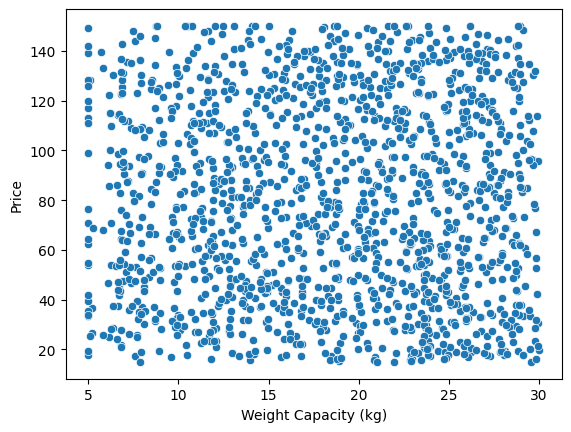

In [6]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.scatterplot(x=X_train_full['Weight Capacity (kg)'].head(1500), y=y_train.head(1500))

In [7]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train_weight_capacity,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
import sklearn
predictions = xgb_model.predict(X_valid_weight_capacity)
print('RMSE = ' + str(np.sqrt(sklearn.metrics.mean_squared_error(predictions, y_valid))))

RMSE = 39.124929083230455


In [9]:
X_test_weight_capacity = X_test_full['Weight Capacity (kg)']
X_test_full.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [10]:
# Predict on test set
test_pred = xgb_model.predict(X_test_weight_capacity)

output = pd.DataFrame({'id': X_test_full.index,
                      'Price': test_pred})

output.to_csv('submission.csv', index=False)